# Facebook Data Analysis

Analyzing facebook post data from the last 6 years for my user profile

from: https://www.dataquest.io/blog/analyze-facebook-data-python/

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json

In [51]:
#read in JSON file
df = pd.read_json('your_posts_1.json')

In [52]:
#remove unneccessary data
df=df.drop(columns=['title','attachments','tags'])

In [53]:
#convert timestamp to datetime
pd.to_datetime(df['timestamp'])

0     2013-08-05 00:22:03
1     2013-08-27 18:17:19
2     2013-10-02 20:29:26
3     2014-01-14 01:44:26
4     2014-04-09 18:00:30
              ...        
119   2018-09-27 21:01:18
120   2018-09-29 14:30:21
121   2018-10-21 21:28:32
122   2019-10-16 15:47:37
123   2020-08-04 16:32:05
Name: timestamp, Length: 124, dtype: datetime64[ns]

In [54]:
#move timestamp to index
df.index = df['timestamp']

In [55]:
clean_data = []

#clean up data col and replace blanks with NaNs
for i in df.iloc[:,1]:
    if i  != []:
        clean_data.append(i)
    else:
        clean_data.append(np.nan)

        
#replace column with cleaned data
df.drop(columns='data')
df['data'] = clean_data

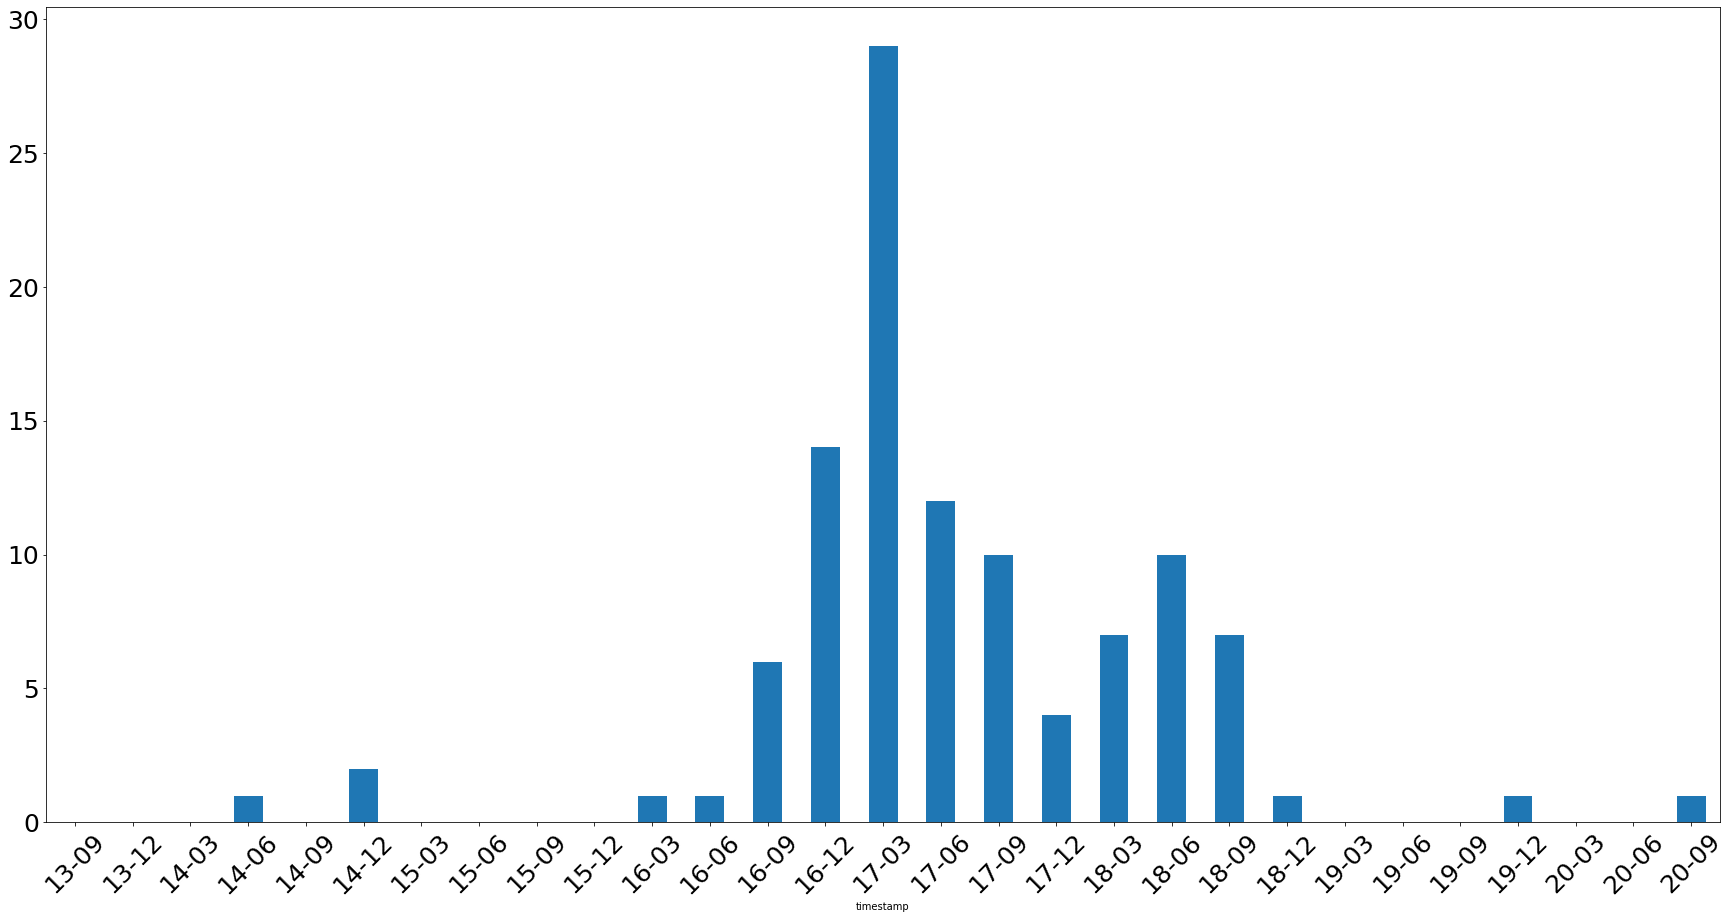

In [56]:
#get quarterly post counts
quarterly_post_counts = df['data'].resample('Q').count()

# plot
fig, ax = plt.subplots()
quarterly_post_counts.plot(kind="bar", figsize=(30,15), ax=ax)

# format xtick-labels with list comprehension
ax.set_xticklabels([x.strftime("%y-%m") for x in quarterly_post_counts.index], rotation=45)

plt.rc('xtick', labelsize=25) 
plt.rc('ytick', labelsize=25) 

plt.show()

In [172]:
#get type of action
type = []

for i in df.data:
    if 'post' in str(i):
        type.append('post')
    elif 'timestamp' in str(i):
        type.append('something else')
    else:
        type.append(i)

df['type'] = type

#pivot the types of actions done over the last 6 years
print(df.groupby(['type'])[['data']].count())
print()

val_cnt=df['type'].value_counts()

posts=val_cnt[0]
smth=val_cnt[1]

print('it looks like I have posted a considerable amount but it is only:',
      str(round(100*float(posts/(posts+smth)),2))+'% of my total posts') 

                data
type                
post              59
something else    48

it looks like I have posted a considerable amount but it is only: 55.14% of my total posts
